# Import the modules
Let's start by importing the necessary packages.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, r2_score

from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Import the data

In [2]:
from sklearn.datasets import load_iris, load_digits, load_breast_cancer, load_wine, load_diabetes, load_linnerud

In [3]:
iris = load_iris()
digits = load_digits()
cancer = load_breast_cancer()
wine = load_wine()

In [4]:
models = {
    "DecisionTree" : DecisionTreeClassifier(),
    "SGD" : SGDClassifier(),
    "RandomForest": RandomForestClassifier(),
    "Perceptron" : Perceptron(),
    "LinearSVC": LinearSVC(C=1),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC()
}

In [5]:
def test_classifier(classifier: tuple, dataset, final_scores) -> None:
    """
    Tests a classifier model and prints the evaluation scores.

    Args:
        classifier (tuple): A tuple containing the model name as the first element and the classifier object as the second element.
        dataset
    Returns:
        final score
    """
    inputs = dataset.data  # Input features
    labels = dataset.target  # Target labels
    X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)
    classifier[1].fit(X_train, y_train)
    scores = cross_val_score(classifier[1], X_test, y_test, cv=10, scoring="accuracy")
    mean_score = scores.mean()
    final_scores[classifier[0]] = mean_score
    return final_scores

In [6]:
def compare_classifiers(dataset, name):

    final_scores = {}

    for key, value in models.items():
         final_scores = test_classifier((key, value), dataset, final_scores)
    plt.figure(figsize=(15, 6))   
    plt.xticks([])
    for i, classifier in enumerate(final_scores.items()):
        plt.bar(i, classifier[1], label=classifier[0])
        plt.text(i, classifier[1], '{:.3f}'.format(classifier[1]), ha='center', va='bottom')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Benchmark of the accuracy of the multiple classification algorithms on the " + name + " dataset")

    plt.show()

I wanted to explore one model, but I figured comparing a few of the sklearn toy models would be more interesting

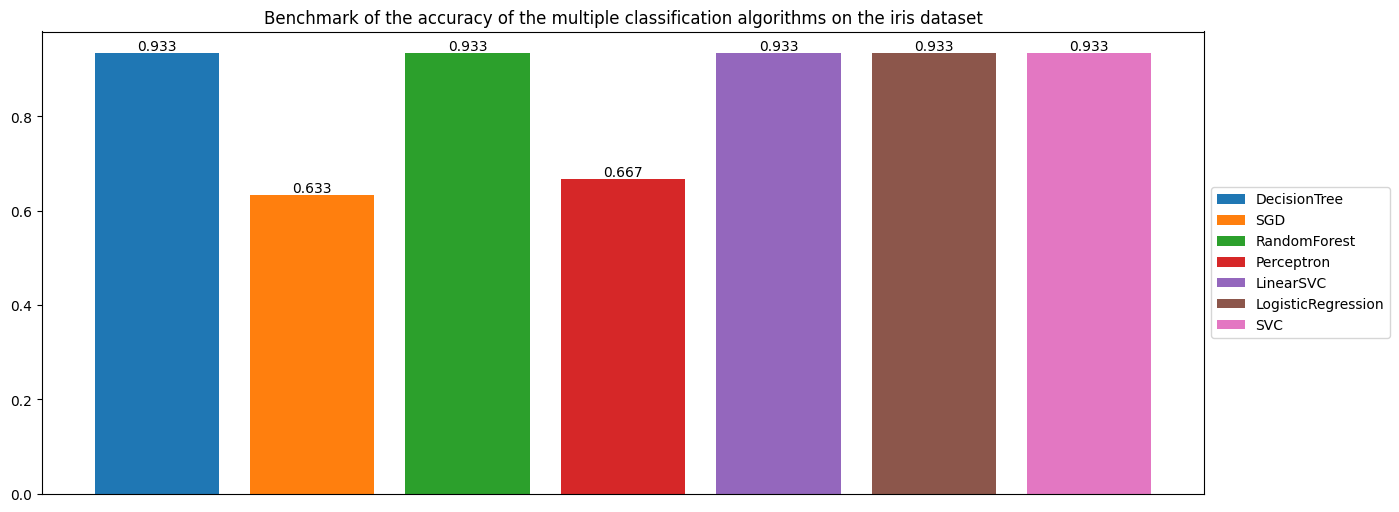

In [7]:
compare_classifiers(iris, "iris")

The iris dataset contains 3 types of different species of the plant iris, and we have access to their sepal and petal width an length.

Most of the algorithms performs well, but SGD and perceptron performs badly. 
they might fail because the documentation tell us that iris isn't a linear problem, while SGD and perceptron specilizes in linear problems.

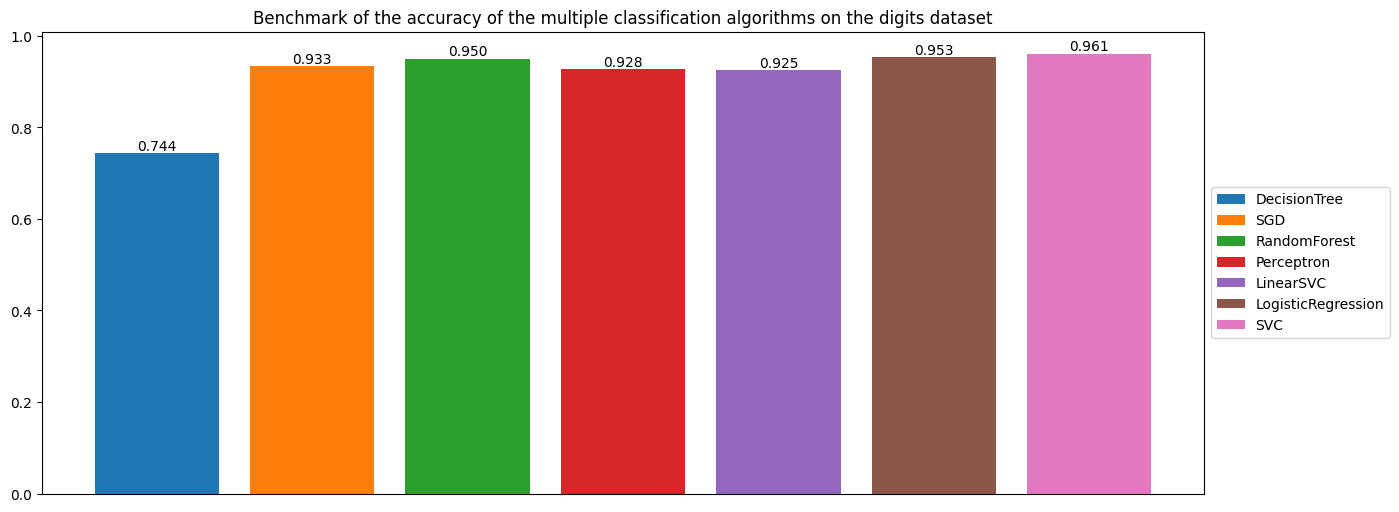

In [8]:
compare_classifiers(digits, "digits")

The digits dataset contains digits from 0 to 9 on 8*8 grids, for a high-dimensional input space of 64 features

Decision tree is suboptimal for digits, while all the others are pretty good. Decision tree is failing because the digits don't have a lack of feature importance, since they are not drawn always on the same pixels.

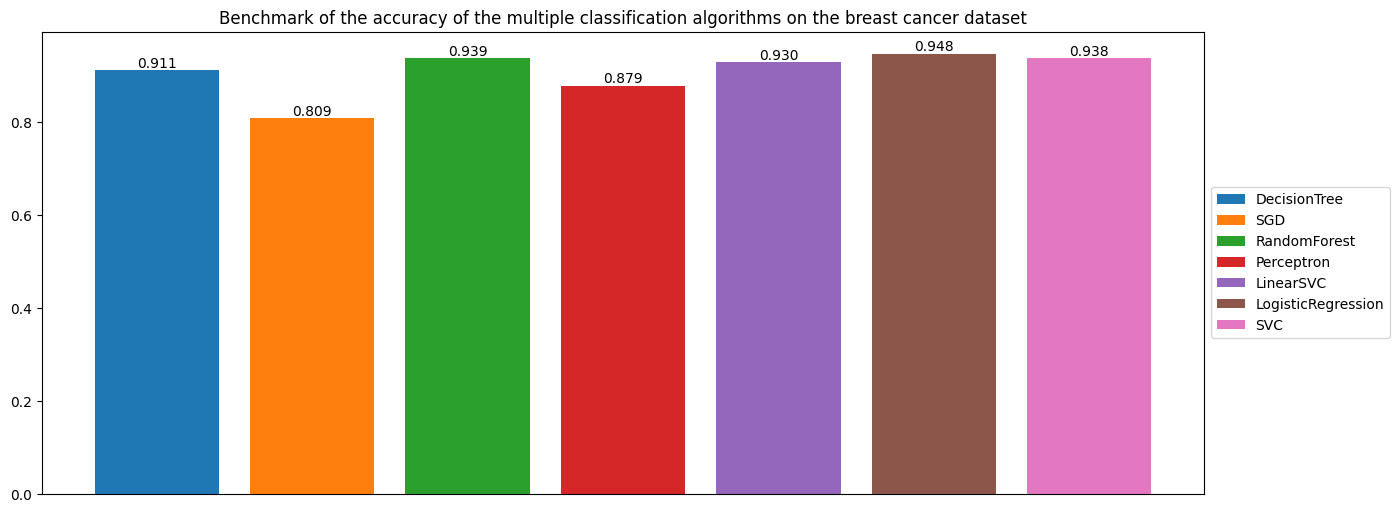

In [9]:
compare_classifiers(cancer, "breast cancer")

the breast cancer dataset is composed of 30 features of the breast like the radius or the texture, and we classify if the breast has cancer or not.

All the classifiers are performing good, so the data must be clear iven if we don't have a lot of samples.

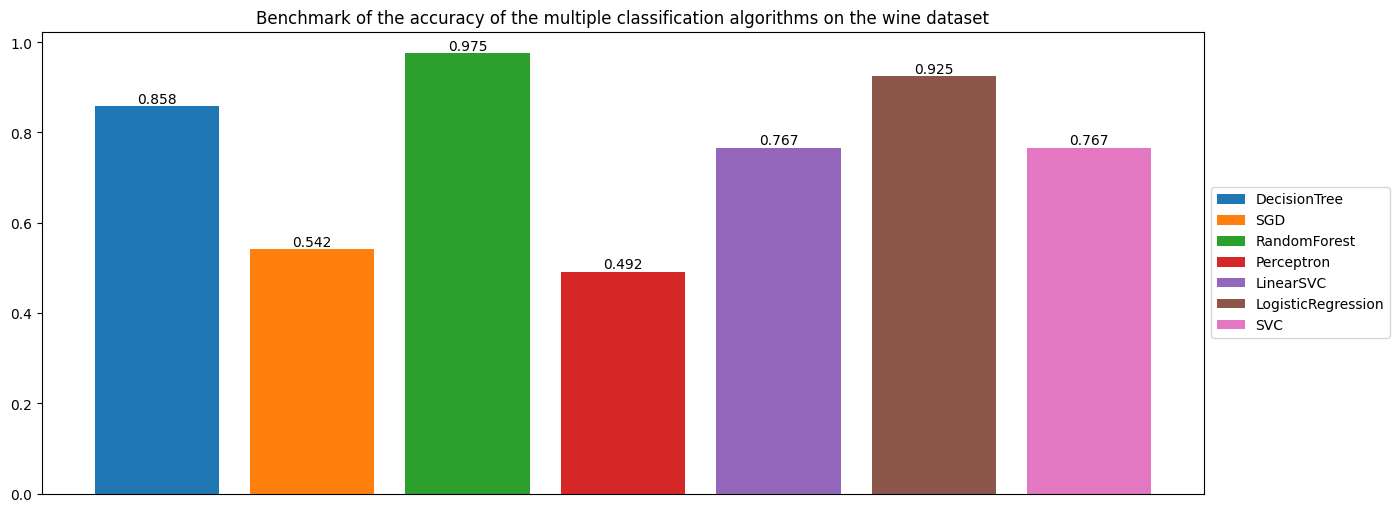

In [10]:
compare_classifiers(wine, "wine")

The wine dataset is composed of 13 attributes like the components or the hue, and we classify the wine in 3 classes to represent the 3 different cultivators.

We see like in iris that SGD and perceptron performs badly, which might be for the same reason of non linearity of the problem.
Meanwhile, random forest seems to be the best classifier, because this classifier is specialised in showing complex relationships between a high amount of dimension while avoiding the potential outliers that might have led the oyher classifiers to perform worse.

So here we can clearly see that the better classifier varry depending on the dataset and the problem.

Random forest seems to be the better classifier overall, but maybe it's only because of the sample of datasets that we have. 